In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, epsilon_0, hbar
from simulations.BalancedHomodyne import BalancedHomodyne

cross area : 3.141592653589793e-06
delay = 0.0
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 8.19672131147541e-13
Average photons per pulse: 6395803.835812459
Photons per second: 390144033984560.0
Field amplitude = 30387.454867910063 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 3.278688524590164e-11
Average photons per pulse: 255832153.43249837
Photons per second: 1.56057613593824e+16
Field amplitude = 192187.13935633373 V/m


/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/balanced_homodyne_detection/experimental_bhd/mach_zender/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/balanced_homodyne_detection/experimental_bhd/mach_zender/.venv/lib/python3.9/site-packages/matplotlib/transforms.py:2855: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


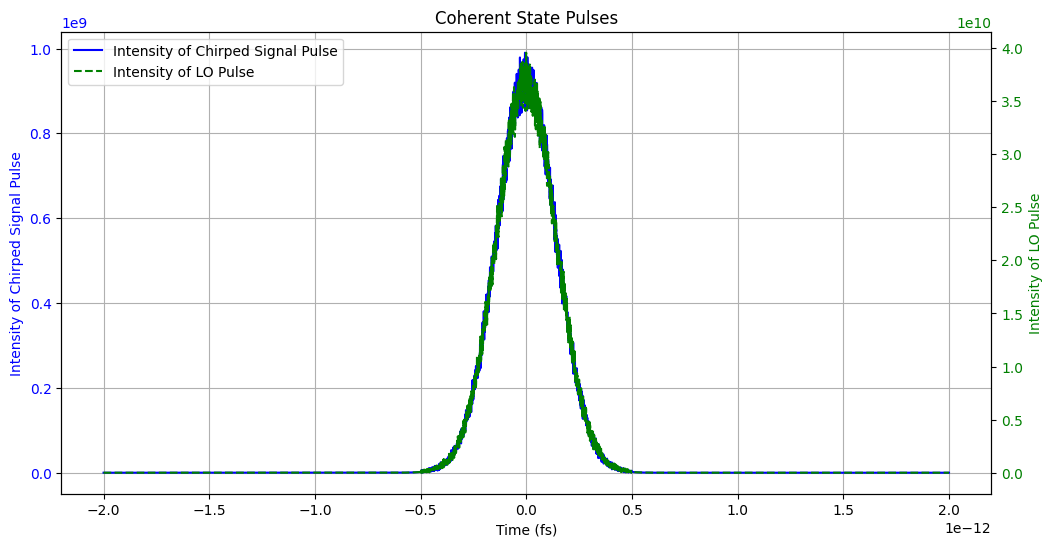

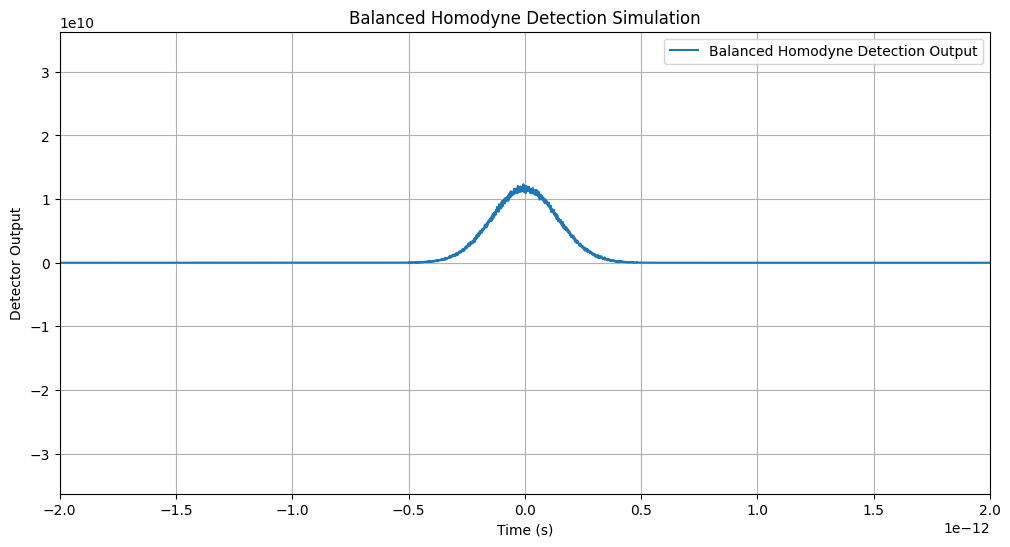

In [4]:
# Given parameters
average_power_signal = 50e-6 # W
average_power_lo = 2e-3 # W
temporal_width_signal = 200e-15  # s
temporal_width_lo = 200e-15  # s
repetition_rate = 61e6  # 61 MHz
central_wavelength = 1550e-9  # 1550 nm
bandwidth = 100e-9  # Bandwidth in meters
beam_radius = 1e-3 # m
cross_area = np.pi*beam_radius**2 # m^2
print(f"cross area : {cross_area}")
gdd_fs2 = 0  # GDD parameter in fs^2
loss_per_fs = 0.1 # Loss factor per femtosecond of delay, representing the linear relationship between delay and losses.
offset_loss = 0 # where the loss_per_fs is equal to zero
opd = 0.00000 # Optical path difference range in meters
delay = opd/c # Temporal delay of the pulse in seconds
print('delay = ' + str(delay))
distortion_signal = False  # apply distortion to signal's spectrum
distortion_lo = False # apply distortion to lo's spectrum

# initialize BHD object
balanced_homodyne = BalancedHomodyne(
    central_wavelength=central_wavelength, # m
    average_power_lo=average_power_lo, # W
    average_power_signal=average_power_signal, # W
    repetition_rate=repetition_rate, # Hz
    temporal_width_lo=temporal_width_lo, # s
    temporal_width_signal=temporal_width_signal, # s
    cross_area=cross_area, # m^2
    time_window=20*temporal_width_lo, # s
    grid_points=5000
    )


# Generate coherent state signal and LO pulses with quantum noise and chirp
signal_pulse = balanced_homodyne.coherent_pulse('signal')
lo_pulse = balanced_homodyne.coherent_pulse('lo', delay=delay)

# Simulate balanced homodyne detection
detector_output = balanced_homodyne.balanced_homodyne_detection(signal_pulse, lo_pulse)

# Plotting
balanced_homodyne.plot_pulses(signal_pulse, lo_pulse, detector_output)

Energy per photon: 1.2815779723541474e-19
Energy per pulse: 8.19672131147541e-13
Average photons per pulse: 6395803.835812459
Photons per second: 390144033984560.0
Field amplitude = 30387.454867910063 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 3.278688524590164e-11
Average photons per pulse: 255832153.43249837
Photons per second: 1.56057613593824e+16
Field amplitude = 192187.13935633373 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 8.19672131147541e-13
Average photons per pulse: 6395803.835812459
Photons per second: 390144033984560.0
Field amplitude = 30387.454867910063 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 3.278688524590164e-11
Average photons per pulse: 255832153.43249837
Photons per second: 1.56057613593824e+16
Field amplitude = 192187.13935633373 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 8.19672131147541e-13
Average photons per pulse: 6395803.835812459
Photons per second: 390144033984560.0
Field 

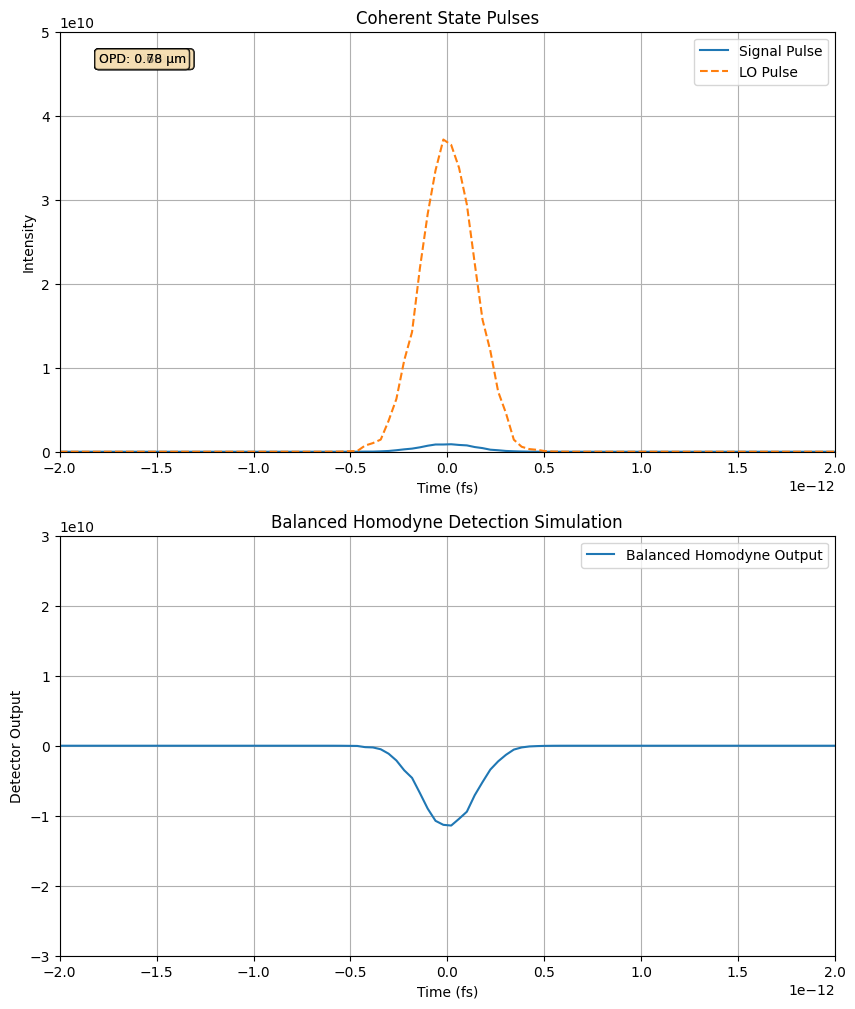

In [16]:
# Optical path differences to explore
opds = np.linspace(-1*temporal_width_lo*c, 1*temporal_width_lo*c, 50)  # meters

balanced_homodyne.animate_pulses(opds)

Energy per photon: 1.2815779723541474e-19
Energy per pulse: 8.19672131147541e-13
Average photons per pulse: 6395803.835812459
Photons per second: 390144033984560.0
Field amplitude = 30387.454867910063 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 3.278688524590164e-11
Average photons per pulse: 255832153.43249837
Photons per second: 1.56057613593824e+16
Field amplitude = 192187.13935633373 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 8.19672131147541e-13
Average photons per pulse: 6395803.835812459
Photons per second: 390144033984560.0
Field amplitude = 30387.454867910063 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 3.278688524590164e-11
Average photons per pulse: 255832153.43249837
Photons per second: 1.56057613593824e+16
Field amplitude = 192187.13935633373 V/m
Energy per photon: 1.2815779723541474e-19
Energy per pulse: 8.19672131147541e-13
Average photons per pulse: 6395803.835812459
Photons per second: 390144033984560.0
Field 

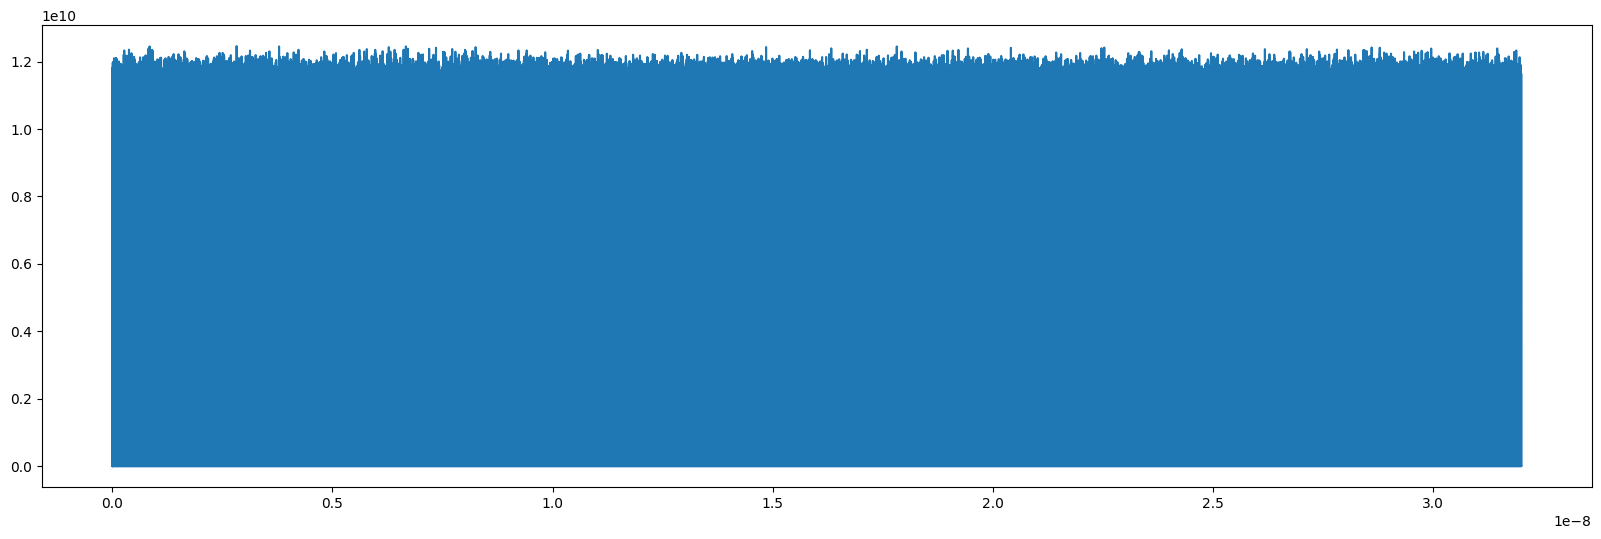

In [11]:
# initialize BHD object
balanced_homodyne = BalancedHomodyne(
    central_wavelength=central_wavelength, # m
    average_power_lo=average_power_lo, # W
    average_power_signal=average_power_signal, # W
    repetition_rate=repetition_rate, # Hz
    temporal_width_lo=temporal_width_lo, # s
    temporal_width_signal=temporal_width_signal, # s
    cross_area=cross_area, # m^2
    time_window=20*temporal_width_lo, # s
    grid_points=100
    )

detector_array, time_array = balanced_homodyne.perform_multiple_measurements(8000)
plt.figure(figsize=(20, 6))
plt.plot(time_array, detector_array)